**Eyap Sales Dataset**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

*Getting the dataset*

In [ ]:
df = pd.read_csv('EYAP_BAYI_SATIS.csv', encoding ='ISO-8859-9', sep=";", header=0)
df.head()

,Yetkili Satıcı Kod,Müşteri Kod,MatbuNo,FaturaTarihi,Hiyerarşi 1,Hiyerarşi 2,Hiyerarşi 3,Net Fiyat_Sum,Adet_Sum,URUN
0,anon_S0,120.05.183,OLC2018000000145,2018.01.12,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,1150.56,1.0,A
1,anon_S2,120.12.TKV0246,AR52018000000146,2018.01.31,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,6240.00,5.0,A
2,anon_S0,120.15.510,EO12018000000545,2018.01.23,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,1342.80,1.0,A
3,anon_S2,120.SB.ANT2294,AR82018000000016,2018.01.03,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,2250.00,2.0,A
4,anon_S2,120.SB.LARA0088,AR82018000000006,2018.01.03,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,1230.00,1.0,A


Explanations:

* Yetkili Satıcı Kod: Yetkili satıcılar 3'e ayrılıyor. Anon_S0, Anon_S1, Anon_S2
* Müşteri Kod
* Matbuno
* Fatura Tarihi: Ürünlerin hangi tarihlerde alındığını gösteriyor.
* Hiyerarşi 1 
* Hiyerarşi 2
* Hiyerarşi 3
* Net Fiyat Sum
* Adet Sum : Kaç adet ürün alındığı veya iade edildiğini gösteriyor.
* Urun: Ürünler 3 gruba ayrılıyor. Sırasıyla A, B ve C ürünlerinde oluşuyor.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30449 entries, 0 to 30448
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Yetkili Satıcı Kod  30449 non-null  object 
 1   Müşteri Kod         30449 non-null  object 
 2   MatbuNo             30449 non-null  object 
 3   FaturaTarihi        30449 non-null  object 
 4   Hiyerarşi 1         30449 non-null  object 
 5   Hiyerarşi 2         30449 non-null  object 
 6   Hiyerarşi 3         30449 non-null  object 
 7   Net Fiyat_Sum       30449 non-null  float64
 8   Adet_Sum            30449 non-null  float64
 9   URUN                30449 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.3+ MB


Fatura tarihi, tarih formatında olmadığı için önce onu obje tipinden tarih tipine dönüştürelim.

In [ ]:
df['FaturaTarihi'] = pd.to_datetime(df['FaturaTarihi'])

Fatura tarihini tarih tipine dönüştürdükten sonra tarih kolonları arttırdık.
*  Gün ay ve yıl kolonları olarak ayırdık.

In [ ]:
df['Weekday'] = df['FaturaTarihi'].dt.day_name()
df['MonthName'] = df['FaturaTarihi'].dt.month_name()
df["year"] = df['FaturaTarihi'].map(lambda x: x.year)

In [ ]:
df.head()

,Yetkili Satıcı Kod,Müşteri Kod,MatbuNo,FaturaTarihi,Hiyerarşi 1,Hiyerarşi 2,Hiyerarşi 3,Net Fiyat_Sum,Adet_Sum,URUN,Weekday,MonthName,year
0,anon_S0,120.05.183,OLC2018000000145,2018-01-12,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,1150.56,1.0,A,Friday,January,2018
1,anon_S2,120.12.TKV0246,AR52018000000146,2018-01-31,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,6240.00,5.0,A,Wednesday,January,2018
2,anon_S0,120.15.510,EO12018000000545,2018-01-23,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,1342.80,1.0,A,Tuesday,January,2018
3,anon_S2,120.SB.ANT2294,AR82018000000016,2018-01-03,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,2250.00,2.0,A,Wednesday,January,2018
4,anon_S2,120.SB.LARA0088,AR82018000000006,2018-01-03,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,1230.00,1.0,A,Wednesday,January,2018


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Net Fiyat_Sum,30449.0,3879.690018,7829.840045,-65408.4,1434.0,2448.3,4496.3388,478026.0
Adet_Sum,30449.0,1.478538,1.885659,-32.0,1.0,1.0,2.0000,125.0
year,30449.0,2019.042005,0.841936,2018.0,2018.0,2019.0,2020.0000,2020.0


In [ ]:
df['URUN'].value_counts()

A    13659
B    13520
C     3270
Name: URUN, dtype: int64

In [ ]:
df['Yetkili Satıcı Kod'].value_counts()

anon_S2    12630
anon_S0     9126
anon_S1     8693
Name: Yetkili Satıcı Kod, dtype: int64

# Verinin tamamı üzerinde bazı görselleştirmeler yapalım.

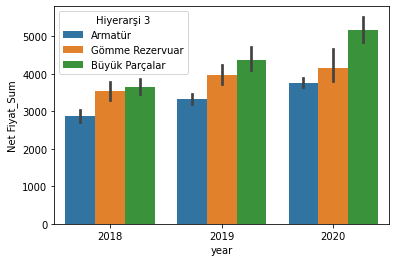

In [ ]:
sns.barplot(x="year", y="Net Fiyat_Sum", hue="Hiyerarşi 3", data=df)

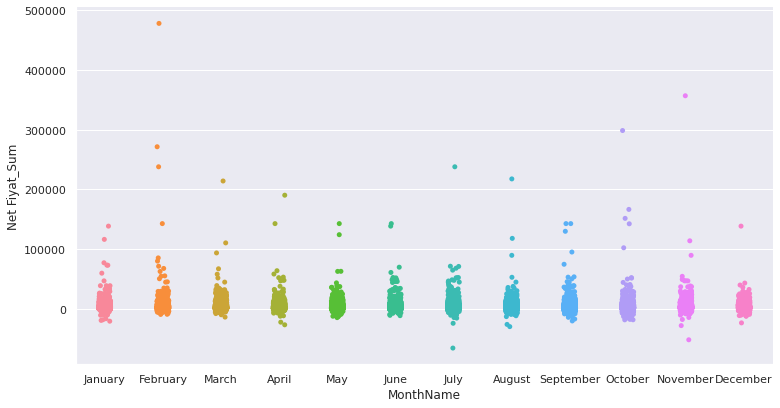

In [ ]:
g = sns.catplot(data=df, x='MonthName', y='Net Fiyat_Sum')
g.fig.set_figwidth(13.10)
g.fig.set_figheight(5.7)

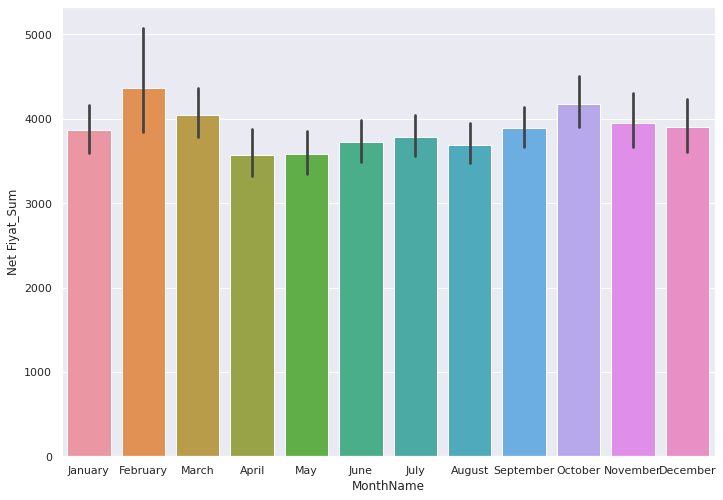

In [ ]:
sns.barplot(x="MonthName", y="Net Fiyat_Sum", data=df)

**Bu veri seti iade edilen ürünlerle beraber olduğu için net fiyat değerinin sıfırdan büyük olduğu yani satılan ürünleri ayrıca incelemek istedim.**

In [ ]:
df[df['Net Fiyat_Sum']>0].count()

Yetkili Satıcı Kod    29159
Müşteri Kod           29159
MatbuNo               29159
FaturaTarihi          29159
Hiyerarşi 1           29159
Hiyerarşi 2           29159
Hiyerarşi 3           29159
Net Fiyat_Sum         29159
Adet_Sum              29159
URUN                  29159
Weekday               29159
MonthName             29159
year                  29159
dtype: int64

29159 ürünü incelemeye başlayalım.
* Öncelikle farklı bir veri seti gibi isimlendirelim.

In [ ]:
EyapSatış = df[df['Net Fiyat_Sum']>0]

In [ ]:
EyapSatış.describe().T

,count,mean,std,min,25%,50%,75%,max
Net Fiyat_Sum,29159.0,4185.858801,7814.744026,14.4,1547.174508,2567.1,4652.3862,478026.0
Adet_Sum,29159.0,1.610378,1.769548,-1.0,1.000000,1.0,2.0000,125.0
year,29159.0,2019.038753,0.842575,2018.0,2018.000000,2019.0,2020.0000,2020.0


In [ ]:
# Burada en çok hangi ürünün satıldığını görmek istedik.
EyapSatış['URUN'].value_counts()

A    13115
B    12882
C     3162
Name: URUN, dtype: int64

In [ ]:
# Burada en çok hangi yetkili satıcılar tarafından satıldığını görmek istedik.
EyapSatış['Yetkili Satıcı Kod'].value_counts()

anon_S2    12094
anon_S0     8726
anon_S1     8339
Name: Yetkili Satıcı Kod, dtype: int64

İade edilen 

A ve B ürünlerinin satış sayıları benzerken C ürününden az sayıda ürün satılmış.
*  Şimdi bu ürünleri görselleştirelim.

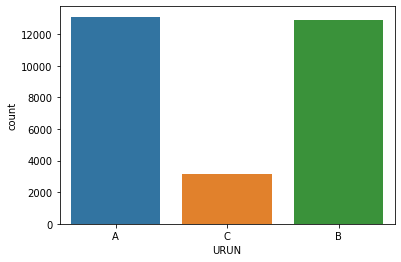

In [ ]:
sns.countplot(x="URUN", data=EyapSatış)

Şimdi de yetkili satıcılarını inceleyelim.
* Ardından görselleştirelim.

In [ ]:
# En fazla hangi yetkili satıcıdan alım yapıldığına bakalım.
EyapSatış['Yetkili Satıcı Kod'].value_counts()

anon_S2    12094
anon_S0     8726
anon_S1     8339
Name: Yetkili Satıcı Kod, dtype: int64

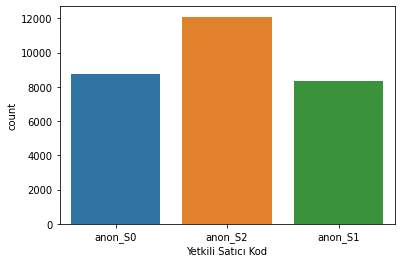

In [ ]:
sns.countplot(x="Yetkili Satıcı Kod", data=EyapSatış)

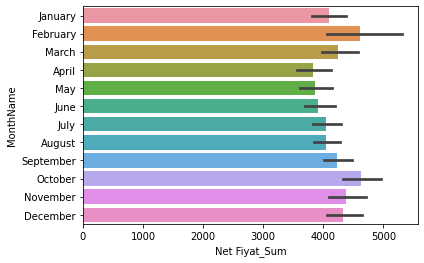

In [ ]:
# Bu satışların hangi aylarda en çok yapıldığına bakalım.
sns.barplot(x="Net Fiyat_Sum", y="MonthName", data=EyapSatış)

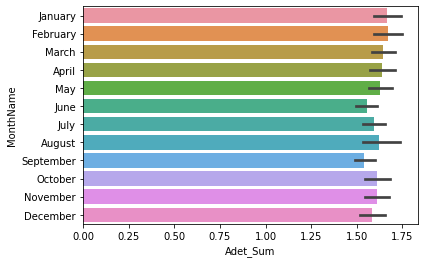

In [ ]:
sns.barplot(x="Adet_Sum", y="MonthName", data=EyapSatış)
# Adet bazında baktığımızda çok büyük değişiklikler azalıyor.

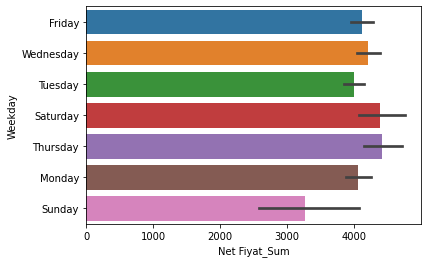

In [ ]:
# Bu satışların en çok hangi günlerde yapıldığına bakalım.
sns.barplot(x="Net Fiyat_Sum", y="Weekday", data=EyapSatış)

# Pazar, Pazartesi ve Salı günlere diğer günlere oranla görece düşük görünüyor.

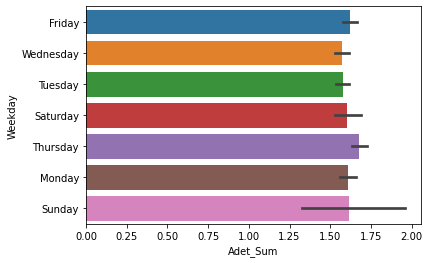

In [ ]:
# Yukarıda bu satış miktarlarının fiyat bazında en çok hangi günlerde yapıldığına bakmıştım.
# Ancak adet sayıları bize daha çok hangi gün müşterilerin geleceğiyle ilgili bilgi verebilir diye adet sayıları üzerinden görselleştiriyorum.

sns.barplot(x="Adet_Sum", y="Weekday", data=EyapSatış)

# Bu şekilde adet sayılarına bakınca mağazdaki adet satışları çok farklılık göstermiyorken
#  net fiyatların bazı günlerde daha fazla olduğunu gözlemliyoruz.

# Şimdi bu yetkili satıcıların en çok hangi ürünleri sattığına grafik yardımıyla bakalım.

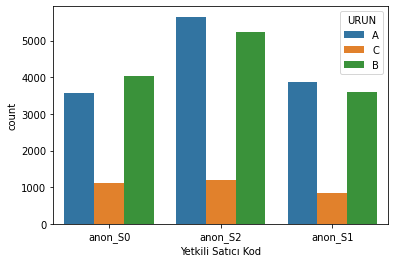

In [ ]:
sns.countplot(x="Yetkili Satıcı Kod",hue='URUN',data=EyapSatış)
# Yetkili satıcıların en çok sattıkları ürünler arasında farklılıklar var.
# C ürünleri benzerlik gösterirken A ve B ürünleri farklılık göstermiş anon_s2 ve anon_s1 arasında.

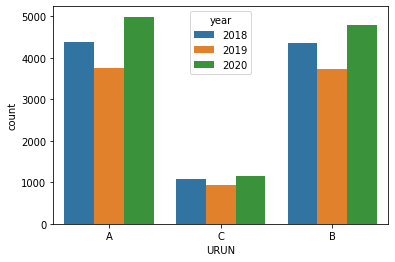

In [ ]:
# Yıllara göre bu ürünlerin satış miktarlarına baktık.
sns.countplot(x="URUN", hue='year', data=EyapSatış)

#### Yukarıdaki görselden hareketle C ürününün satışının yıllara göre farkı çok gözlemlenmemekte. Bunun dışında buradan 2018'den 2019'a gelirken satışların azaldığını ve 2020'de tekrar arttığını gözlemliyoruz.

# İade edilen veriler üzerindeki analizleri ve görselleştirmeler**

1290 tane verinin net fiyat sum değeri 0'dan küçük.

In [ ]:
df[df['Adet_Sum']<=0].count()

Yetkili Satıcı Kod    1297
Müşteri Kod           1297
MatbuNo               1297
FaturaTarihi          1297
Hiyerarşi 1           1297
Hiyerarşi 2           1297
Hiyerarşi 3           1297
Net Fiyat_Sum         1297
Adet_Sum              1297
URUN                  1297
Weekday               1297
MonthName             1297
year                  1297
dtype: int64

Adet sum değerlerine baktığımız zaman 1297 tane verinin sıfırdan küçük olduğunu gözlemledik.
* Burada dikkatimizi net fiyat sum değeri ile adet fiyat sum değeri arasındaki fark çekti. Eksili değerler iadeyi temsil ettiği halde bir uyuşmazlık vardı. 7 veriyi droplamaya karar verdik.
* Ondan önce bu 7 verinin müşteri numaralarını gözlemlemeye karar verdik.

In [ ]:
# Adet sum değerinin sıfır olduğu müşteriyi gözlemledik.
df[df['Adet_Sum']==0]

,Yetkili Satıcı Kod,Müşteri Kod,MatbuNo,FaturaTarihi,Hiyerarşi 1,Hiyerarşi 2,Hiyerarşi 3,Net Fiyat_Sum,Adet_Sum,URUN,Weekday,MonthName,year
18101,anon_S1,120.01.G2039,GNY2019000005394,2019-11-11,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,234.0,0.0,B,Monday,November,2019


In [ ]:
# o müşterinin alımlarına baktık.
df[df['Müşteri Kod']=='120.01.G2039']

,Yetkili Satıcı Kod,Müşteri Kod,MatbuNo,FaturaTarihi,Hiyerarşi 1,Hiyerarşi 2,Hiyerarşi 3,Net Fiyat_Sum,Adet_Sum,URUN,Weekday,MonthName,year
17881,anon_S1,120.01.G2039,GNY2019000005394,2019-11-11,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,768.60,1.0,B,Monday,November,2019
18098,anon_S1,120.01.G2039,GNY2019000005423,2019-11-14,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,1307.16,1.0,B,Thursday,November,2019
18101,anon_S1,120.01.G2039,GNY2019000005394,2019-11-11,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,234.00,0.0,B,Monday,November,2019
24181,anon_S1,120.01.G2039,GNC2020000000045,2020-07-31,"Armatür, Aksesuar & Gömme Reze",Gömme/Plastik Rezervuar,Gömme Rezervuar,-65408.40,-24.0,C,Friday,July,2020


In [ ]:
(df[df['Net Fiyat_Sum']<0]['Adet_Sum']>0).count()

1290

Net fiyat sum değerinin sıfırdan küçük olduğu 1290 veriyi iade ismiyle tutup oradaki verilere incelemeye karar verdik.

In [ ]:
Iade = df[df['Net Fiyat_Sum']<0]

In [ ]:
Iade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 33 to 30425
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Yetkili Satıcı Kod  1290 non-null   object        
 1   Müşteri Kod         1290 non-null   object        
 2   MatbuNo             1290 non-null   object        
 3   FaturaTarihi        1290 non-null   datetime64[ns]
 4   Hiyerarşi 1         1290 non-null   object        
 5   Hiyerarşi 2         1290 non-null   object        
 6   Hiyerarşi 3         1290 non-null   object        
 7   Net Fiyat_Sum       1290 non-null   float64       
 8   Adet_Sum            1290 non-null   float64       
 9   URUN                1290 non-null   object        
 10  Weekday             1290 non-null   object        
 11  MonthName           1290 non-null   object        
 12  year                1290 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), ob

İade veri setimizde 1290 veri var.

In [ ]:
Iade.describe().T

,count,mean,std,min,25%,50%,75%,max
Net Fiyat_Sum,1290.0,-3040.911176,4079.693636,-65408.4,-3750.0,-1866.15,-884.19,-6.0
Adet_Sum,1290.0,-1.501550,1.969216,-32.0,-1.0,-1.00,-1.00,-1.0
year,1290.0,2019.115504,0.824278,2018.0,2018.0,2019.00,2020.00,2020.0


In [ ]:
Iade['URUN'].value_counts()

B    638
A    544
C    108
Name: URUN, dtype: int64

Şimdi iade edilen verilerimiz üzerinden görselleştirmeler yapalım.

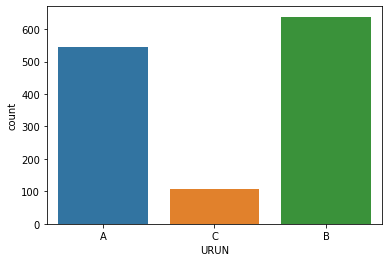

In [ ]:
# İade edilen verilerden en çok iade edilen ürünü bulalım.
# En çok B ürünü en az C ürünü iade edilmiş.
sns.countplot(x="URUN", data=Iade)

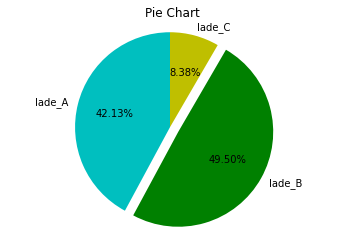

In [ ]:
labels = 'Iade_A', 'Iade_B', 'Iade_C'
sections = [543,638,108]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') 
plt.title('Pie Chart ')
plt.show()

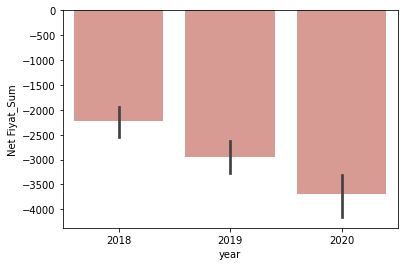

In [ ]:
# Iade edilen ürünlerin toplam fiyatlarının yıllara göre incelenmesi.
sns.barplot(x="year", y="Net Fiyat_Sum", data=Iade, color="salmon", saturation=.5)

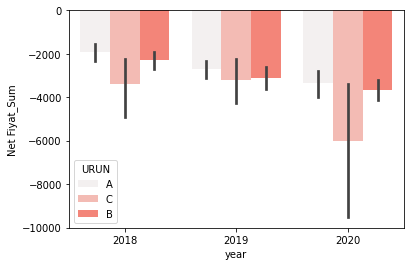

In [ ]:
sns.barplot(x="year", y="Net Fiyat_Sum",hue='URUN', data=Iade,
                 color="salmon", saturation=.9)

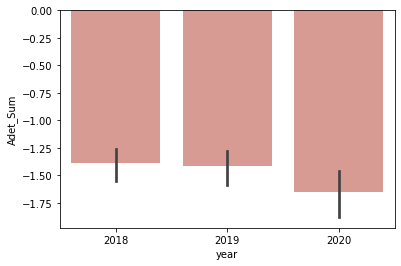

In [ ]:
# En fazla iade miktarı 2020 yılında gerçekleşmiş.
# Buradan adet değerlerine bakarak 2020'ye doğru iade edilen adet artmış mı diye inceleyelim.
sns.barplot(x="year", y="Adet_Sum", data=Iade, color="salmon", saturation=.5)

2018 ve 2019 yılında adet değerleri yakınlık gösterirken net fiyat değerleri değişiklik göstermiş. 2020 yılında ise iade edilen adet sayısı artmış buna bağlı olarak da net fiyat tutarı da artmış.

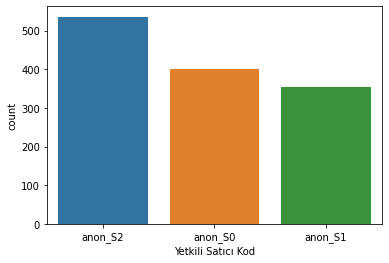

In [ ]:
# Şimdi yetkili satıcılara bakalım.
sns.countplot(x="Yetkili Satıcı Kod", data=Iade)

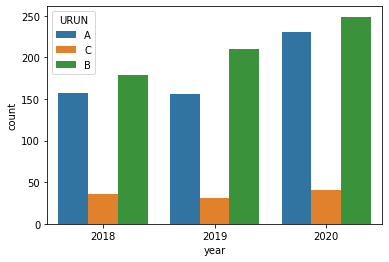

In [ ]:
sns.countplot(x="year", hue="URUN", data=Iade)
# Bu grafikten yıllara göre iade edilen B ürünü miktarının arttığını gözlemliyoruz.
# C ürünün iade sayıları yıllara göre sabit kalmış gibi.

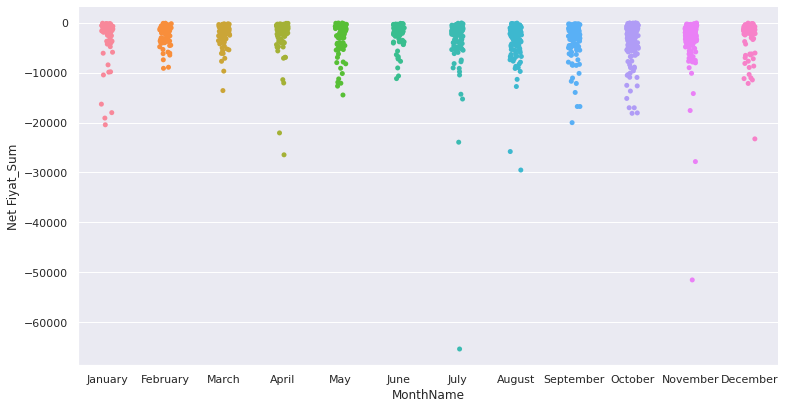

In [ ]:
# Aylara göre yapılan iadelerin net fiyat tutarını inceleyelim
import seaborn as sns 
g = sns.catplot(data=Iade, x='MonthName', y='Net Fiyat_Sum')
g.fig.set_figwidth(13.27)
g.fig.set_figheight(5.7)

# buradan iadeler üzerine net fiyat toplamının şubat ayında diğer aylara görece daha az olduğunu gördüm.

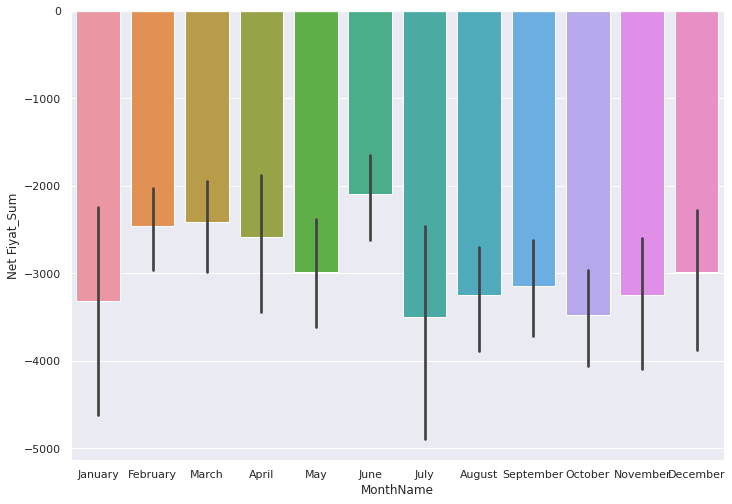

In [ ]:
sns.barplot(x="MonthName", y="Net Fiyat_Sum", data=Iade)

Yukarıda aylara göre iade miktarlarını görselleştirince yıllara göre nasıl olduğunu merak ettim. 
* Hep temmuz ayında iade miktarı fazla diye görebilmek için.

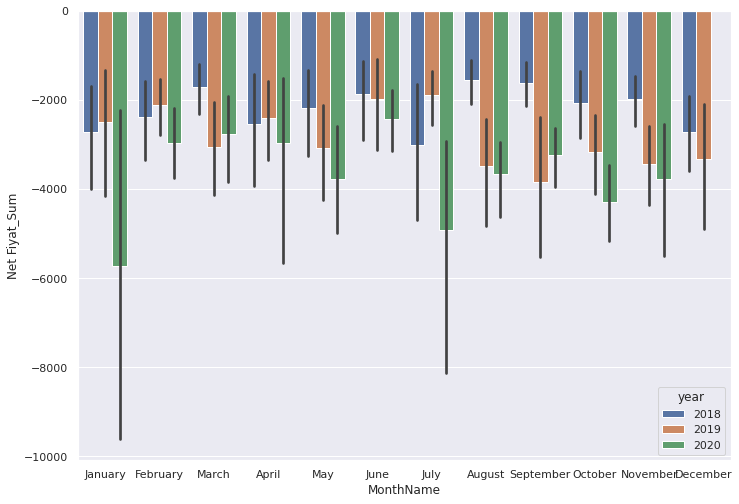

In [ ]:
sns.barplot(x="MonthName", y="Net Fiyat_Sum", hue='year', data=Iade)

In [ ]:
Iade['Yetkili Satıcı Kod'].value_counts()

anon_S2    536
anon_S0    400
anon_S1    354
Name: Yetkili Satıcı Kod, dtype: int64

Şimdi teker teker iade edilen A, B ve C ürünlerinin bilgilerine göz atalım.

In [ ]:
Iade[Iade['URUN']=='A'].value_counts()

Yetkili Satıcı Kod  Müşteri Kod     MatbuNo           FaturaTarihi  Hiyerarşi 1                     Hiyerarşi 2  Hiyerarşi 3  Net Fiyat_Sum  Adet_Sum  URUN  Weekday    MonthName  year
anon_S2             120.SB.ISP0495  I091472           2019-04-09    Armatür, Aksesuar & Gömme Reze  Armatürler   Armatür      -241.20        -1.0      A     Tuesday    April      2019    2
anon_S1             120.01.A5547    GIB2020000000028  2020-10-16    Armatür, Aksesuar & Gömme Reze  Armatürler   Armatür      -12630.00      -1.0      A     Friday     October    2020    1
                    120.01.B1224    151709            2020-06-05    Armatür, Aksesuar & Gömme Reze  Armatürler   Armatür      -2205.36       -1.0      A     Friday     June       2020    1
                    120.01.A5725    151894            2020-11-05    Armatür, Aksesuar & Gömme Reze  Armatürler   Armatür      -2752.50       -1.0      A     Thursday   November   2020    1
                    120.01.A5656    151648            2020-1

In [ ]:
Iade[Iade['URUN']=='B'].value_counts()

Yetkili Satıcı Kod  Müşteri Kod     MatbuNo           FaturaTarihi  Hiyerarşi 1           Hiyerarşi 2               Hiyerarşi 3     Net Fiyat_Sum  Adet_Sum  URUN  Weekday    MonthName  year
anon_S2             320.01.0436     IGR-00001001      2020-04-09    SSG & Tamamlayıcılar  Seramik Sağlık Gereçleri  Büyük Parçalar  -4866.000      -1.0      B     Thursday   April      2020    1
anon_S1             120.01.B2495    BYK2019000000529  2019-08-05    SSG & Tamamlayıcılar  Seramik Sağlık Gereçleri  Büyük Parçalar  -7864.200      -1.0      B     Monday     August     2019    1
                    120.01.C1111    151531            2019-08-21    SSG & Tamamlayıcılar  Seramik Sağlık Gereçleri  Büyük Parçalar  -3583.440      -1.0      B     Wednesday  August     2019    1
                    120.01.B2625    151641            2020-09-28    SSG & Tamamlayıcılar  Seramik Sağlık Gereçleri  Büyük Parçalar  -2376.300      -1.0      B     Monday     September  2020    1
                              

In [ ]:
Iade[Iade['URUN']=='C'].value_counts()

Yetkili Satıcı Kod  Müşteri Kod      MatbuNo           FaturaTarihi  Hiyerarşi 1                     Hiyerarşi 2              Hiyerarşi 3      Net Fiyat_Sum  Adet_Sum  URUN  Weekday    MonthName  year
anon_S2             120.SB.LARA0595  I024735           2019-06-21    Armatür, Aksesuar & Gömme Reze  Gömme/Plastik Rezervuar  Gömme Rezervuar  -1266.000      -1.0      C     Friday     June       2019    1
anon_S0             120.50.408       000559            2018-01-22    Armatür, Aksesuar & Gömme Reze  Gömme/Plastik Rezervuar  Gömme Rezervuar  -3045.204      -2.0      C     Monday     January    2018    1
                    120.14.547       NAP2020000000038  2020-03-02    Armatür, Aksesuar & Gömme Reze  Gömme/Plastik Rezervuar  Gömme Rezervuar  -4194.000      -3.0      C     Monday     March      2020    1
                    120.15.748       OLG2020000000078  2020-08-14    Armatür, Aksesuar & Gömme Reze  Gömme/Plastik Rezervuar  Gömme Rezervuar  -2169.000      -1.0      C     Friday 

In [ ]:
Iade['Müşteri Kod'].value_counts()

120.05.183        54
120.PS.11         29
120.PŞ.16         14
120.01.S4747      13
120.14.519        12
                  ..
120.50.943         1
120.SB.ISP2519     1
120.11.430         1
120.02.ANT1106     1
120.14.518         1
Name: Müşteri Kod, Length: 732, dtype: int64

In [ ]:
# Burada çok fazla iade eden müşterilere bakmak istedim.
Iade[Iade['Müşteri Kod']=='120.05.183']

,Yetkili Satıcı Kod,Müşteri Kod,MatbuNo,FaturaTarihi,Hiyerarşi 1,Hiyerarşi 2,Hiyerarşi 3,Net Fiyat_Sum,Adet_Sum,URUN,Weekday,MonthName,year
907,anon_S0,120.05.183,EMD2018000000026,2018-02-03,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-73.80000,-1.0,A,Saturday,February,2018
1310,anon_S0,120.05.183,EMD2018000000028,2018-02-05,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,-369.96966,-1.0,B,Monday,February,2018
1369,anon_S0,120.05.183,EMD2018000000027,2018-02-03,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,-3217.14000,-1.0,B,Saturday,February,2018
1619,anon_S0,120.05.183,EMD2018000000094,2018-03-26,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-1170.59760,-1.0,A,Monday,March,2018
3335,anon_S0,120.05.183,EMD2018000000124,2018-04-20,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,-513.27360,-1.0,B,Friday,April,2018
6500,anon_S0,120.05.183,EMD2018000000257,2018-08-09,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-4197.74760,-1.0,A,Thursday,August,2018
6619,anon_S0,120.05.183,EMD2018000000281,2018-08-18,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,-188.07120,-1.0,B,Saturday,August,2018
6914,anon_S0,120.05.183,EMD2018000000277,2018-08-14,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,-513.27360,-1.0,B,Tuesday,August,2018
6915,anon_S0,120.05.183,EMD2018000000278,2018-08-16,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,-513.27360,-1.0,B,Thursday,August,2018
8116,anon_S0,120.05.183,EMD2018000000405,2018-10-30,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-523.20600,-1.0,A,Tuesday,October,2018


2018, 2019 ve 2020 yıllarında farklı hiyerarşilerden 54 tane ürün iade edilmiş.

In [ ]:
# İade miktarı 10 dan fazla olan müşterileri görmek istedim.


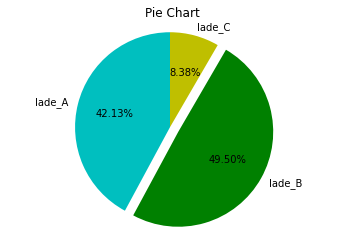

In [ ]:
labels = 'Iade_A', 'Iade_B', 'Iade_C'
sections = [543,638,108]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') 
plt.title('Pie Chart ')
plt.show()